# Quantum State Evolution GIF:  |Ψ⟩ = H Z H |0⟩  
This notebook computes the evolution of the state  
$|\Psi\rangle = H Z H |0\rangle$
and generates a GIF showing the Bloch-sphere trajectory.

We will:
1. Define quantum gates and the initial state  
2. Compute intermediate states step-by-step  
3. Convert states to Bloch vector coordinates  
4. Plot Bloch sphere frames  
5. Assemble all frames into an animated GIF  


In [27]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio.v2 as imageio
from IPython.display import Image, display
import os


## Computational Basis and Quantum Gates

We define:
- |0⟩ and |1⟩ basis states
- Pauli matrices X, Y, Z
- Hadamard H gate

These will be used to compute the evolution of the state.


In [28]:
# Basis states
zero = np.array([1.0, 0.0], dtype=complex)
one  = np.array([0.0, 1.0], dtype=complex)

# Quantum gates
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]], dtype=complex)

Z = np.array([[1,  0],
              [0, -1]], dtype=complex)

X = np.array([[0, 1],
              [1, 0]], dtype=complex)

Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)


## State Evolution:  |0⟩ → H|0⟩ → ZH|0⟩ → HZH|0⟩

We compute each step and store the states for plotting.


In [29]:
states = []
labels = []

psi0 = zero
states.append(psi0); labels.append("|0⟩ (initial)")

psi1 = H @ psi0
states.append(psi1); labels.append("H |0⟩")

psi2 = Z @ psi1
states.append(psi2); labels.append("Z H |0⟩")

psi3 = H @ psi2
states.append(psi3); labels.append("H Z H |0⟩ (final)")


## Bloch Sphere Coordinates
Each state is mapped to: $(s_x, s_y, s_z) = (\langle X\rangle, \langle Y\rangle, \langle Z\rangle)$


This determines the location on the Bloch sphere.


In [30]:
def bloch_coords(psi):
    psi = psi / np.linalg.norm(psi)
    a, b = psi[0], psi[1]

    sx = 2 * np.real(np.conj(a)*b)
    sy = 2 * np.imag(np.conj(b)*a)
    sz = np.abs(a)**2 - np.abs(b)**2

    return sx, sy, sz


## Plotting the State on a Bloch Sphere

This function:
- draws a transparent Bloch sphere
- draws the quantum state as a 3D arrow
- saves the frame as a PNG


In [31]:
def plot_bloch(sx, sy, sz, label, filename):
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')

    # sphere mesh
    u = np.linspace(0, 2*np.pi, 60)
    v = np.linspace(0, np.pi, 30)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones_like(u), np.cos(v))

    ax.plot_surface(x, y, z, alpha=0.1, linewidth=0)

    # state vector
    ax.quiver(0, 0, 0, sx, sy, sz, length=1.0)

    # limits and labels
    ax.set_xlim([-1,1]); ax.set_ylim([-1,1]); ax.set_zlim([-1,1])
    ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
    ax.set_title(label)
    ax.set_box_aspect([1,1,1])

    plt.tight_layout()
    plt.savefig(filename, dpi=100)
    plt.close(fig)


## Generate Bloch Sphere Frames

Each state is plotted and saved as a PNG image.


In [32]:
frames_dir = "frames_hzh"
os.makedirs(frames_dir, exist_ok=True)

frame_paths = []

for i, (psi, label) in enumerate(zip(states, labels)):
    sx, sy, sz = bloch_coords(psi)
    fname = f"{frames_dir}/frame_{i:02d}.png"
    plot_bloch(sx, sy, sz, label, fname)
    frame_paths.append(fname)

# hold final frame
for _ in range(5):
    frame_paths.append(frame_paths[-1])


## Create the GIF Animation

All frames are combined into a single GIF file.


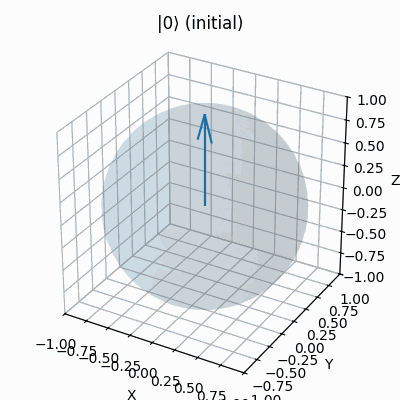

In [45]:
images = [imageio.imread(fp) for fp in frame_paths]
gif_path = "hzh_evolution.gif"
imageio.mimsave(gif_path, images, duration=1000.0)

# Display GIF inline
display(Image(filename=gif_path))